<a href="https://colab.research.google.com/github/mustafa-vu/dmpm-qb/blob/main/qb2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment -2

Use a suitable data-set from kaggle.com. Build a suitable multiple linear regression model using R/Python. Analyze the predicted values of the response variable. Discuss the model summary, interpret the regression coefficients and write the model equation. Compute the residuals and plot the residual values. Compute all possible metrics to determine the accuracy and efficiency of your regression model.

Step 1 - ETL of data

In [2]:
df = read.csv("ToyotaCorolla.csv")
head(df)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,13500,23,46986,Diesel,90,1,0,2000,3,1165
2,13750,23,72937,Diesel,90,1,0,2000,3,1165
3,13950,24,41711,Diesel,90,1,0,2000,3,1165
4,14950,26,48000,Diesel,90,0,0,2000,3,1165
5,13750,30,38500,Diesel,90,0,0,2000,3,1170
6,12950,32,61000,Diesel,90,0,0,2000,3,1170


**Variable Description**

a.Price - Offer price in EUROs
b.Age - Age in months
c.KM - Accumulated kilometers on odometer
d.FuelType - Fuel type (petrol, diesel, CNG)
e.HP - Horsepower
f.MetColor - Metallic color (Yes=1, No=0)
g.Automatic - Automatic (Yes=1, No=0)
In [1]:
df = read.csv("ToyotaCorolla.csv")
head(df)
h.CC - Cylinder volume in cubic centimeters
i.Doors - Number of doors
j.Weight - Weight in kilograms

In [3]:
str(df)

'data.frame':	1436 obs. of  10 variables:
 $ Price    : int  13500 13750 13950 14950 13750 12950 16900 18600 21500 12950 ...
 $ Age      : int  23 23 24 26 30 32 27 30 27 23 ...
 $ KM       : int  46986 72937 41711 48000 38500 61000 94612 75889 19700 71138 ...
 $ FuelType : chr  "Diesel" "Diesel" "Diesel" "Diesel" ...
 $ HP       : int  90 90 90 90 90 90 90 90 192 69 ...
 $ MetColor : int  1 1 1 0 0 0 1 1 0 0 ...
 $ Automatic: int  0 0 0 0 0 0 0 0 0 0 ...
 $ CC       : int  2000 2000 2000 2000 2000 2000 2000 2000 1800 1900 ...
 $ Doors    : int  3 3 3 3 3 3 3 3 3 3 ...
 $ Weight   : int  1165 1165 1165 1165 1170 1170 1245 1245 1185 1105 ...


In [4]:
for (col in colnames(df)) {
 if (any(is.na(df[,col]))) {
 print(col)
 print("The above column has null values")
 } }

In [5]:
#converting all categorical columns to categorical
#some of our columns are mentioned as numeric types but are actually categorical. Like the
#actually means 1 for yes and 0 for no
df$MetColor = as.factor(df$MetColor)
df$Automatic = as.factor(df$Automatic)
df$Doors = as.factor(df$Doors)
str(df)

'data.frame':	1436 obs. of  10 variables:
 $ Price    : int  13500 13750 13950 14950 13750 12950 16900 18600 21500 12950 ...
 $ Age      : int  23 23 24 26 30 32 27 30 27 23 ...
 $ KM       : int  46986 72937 41711 48000 38500 61000 94612 75889 19700 71138 ...
 $ FuelType : chr  "Diesel" "Diesel" "Diesel" "Diesel" ...
 $ HP       : int  90 90 90 90 90 90 90 90 192 69 ...
 $ MetColor : Factor w/ 2 levels "0","1": 2 2 2 1 1 1 2 2 1 1 ...
 $ Automatic: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ CC       : int  2000 2000 2000 2000 2000 2000 2000 2000 1800 1900 ...
 $ Doors    : Factor w/ 4 levels "2","3","4","5": 2 2 2 2 2 2 2 2 2 2 ...
 $ Weight   : int  1165 1165 1165 1165 1170 1170 1245 1245 1185 1105 ...


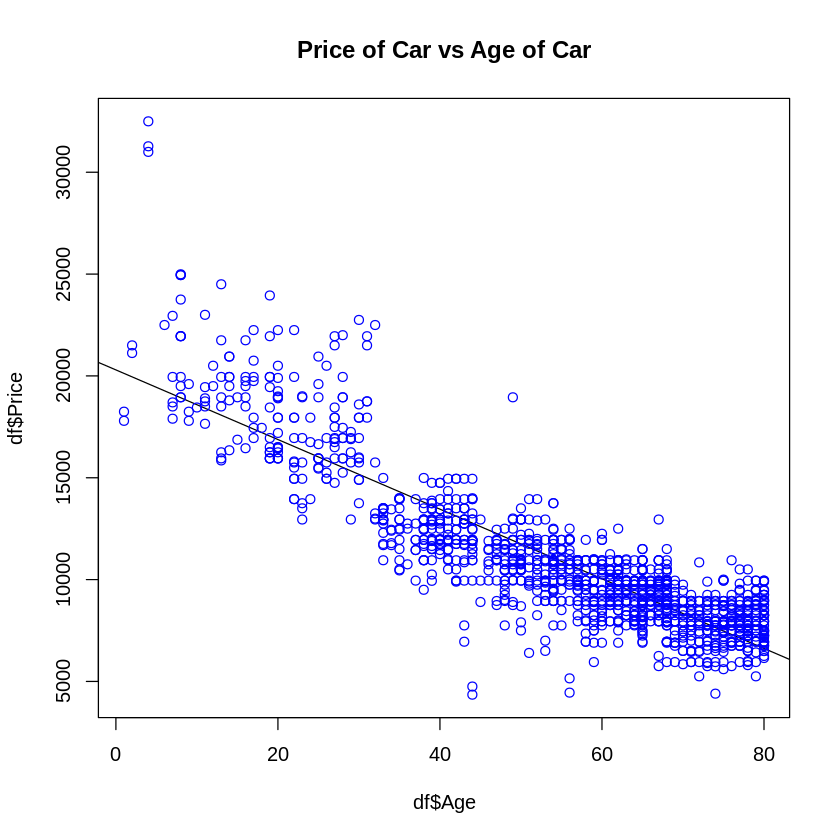

In [7]:
#Let us check the relation between some columns which might be improtant to our model
plot(df$Age,df$Price, col='blue', main = 'Price of Car vs Age of Car',abline(lm(df$Price~df$Age)))

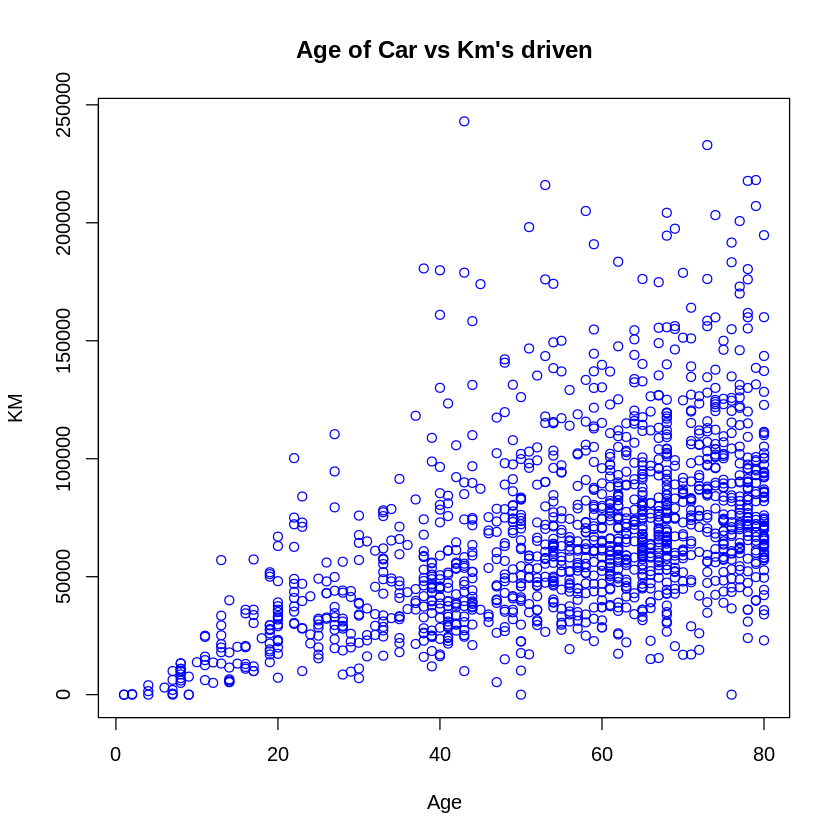

In [8]:
#Is the car which is the oldest also driven the most or is it more of a bell curve, lets f
plot(df$Age,df$KM, col='blue', main = "Age of Car vs Km\'s driven", xlab = "Age", ylab = "KM")

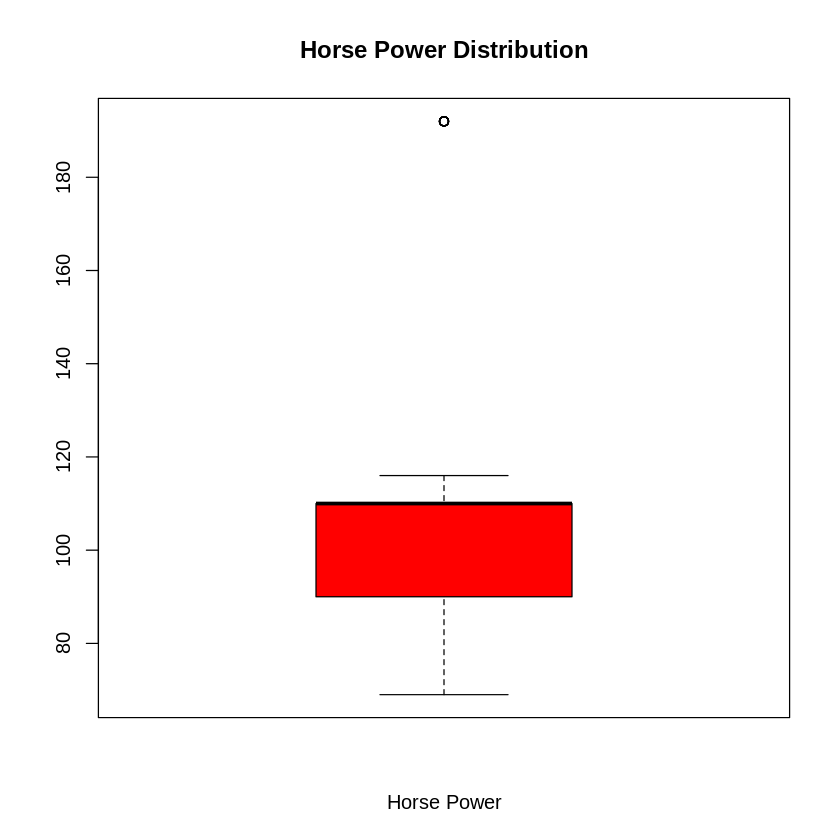

In [9]:
#Let us see how our horse Power is distributed
# Plot the chart.
boxplot(df$HP, xlab = "Horse Power" , main = "Horse Power Distribution", col="red")

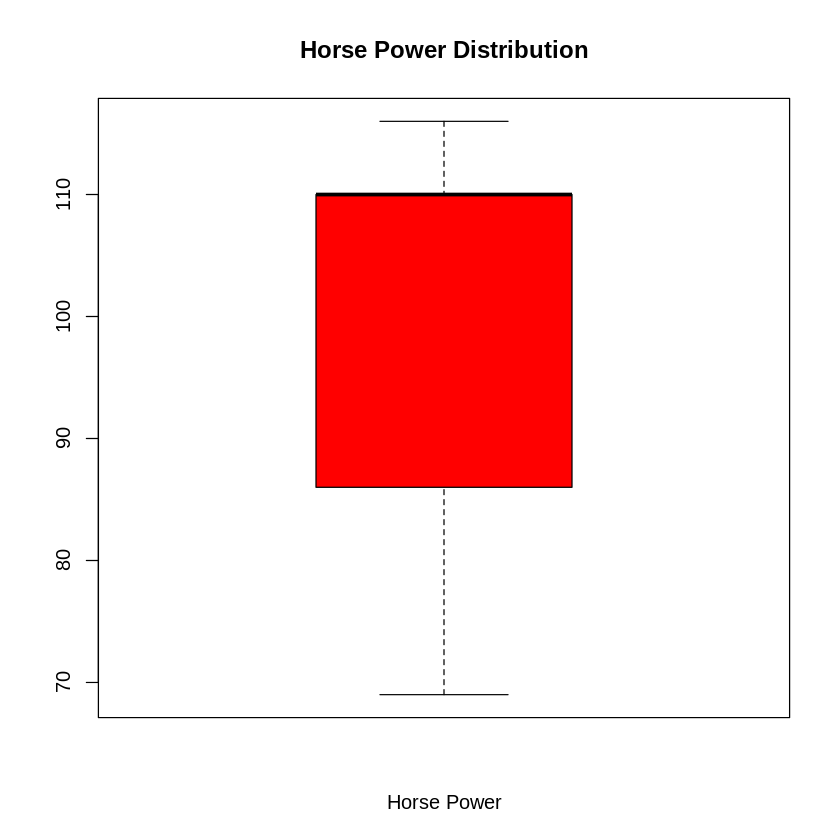

In [10]:
#Oh, an outlier
#Outliers can always be dangerous if not treated properly
#In this case, the horse power is showing a case where the outlier lies above 180 HP. Sinc
#we can drop that row
filter_df <- df[(df$HP<180),]
boxplot(filter_df$HP, xlab = "Horse Power", main = "Horse Power Distribution", col="red")

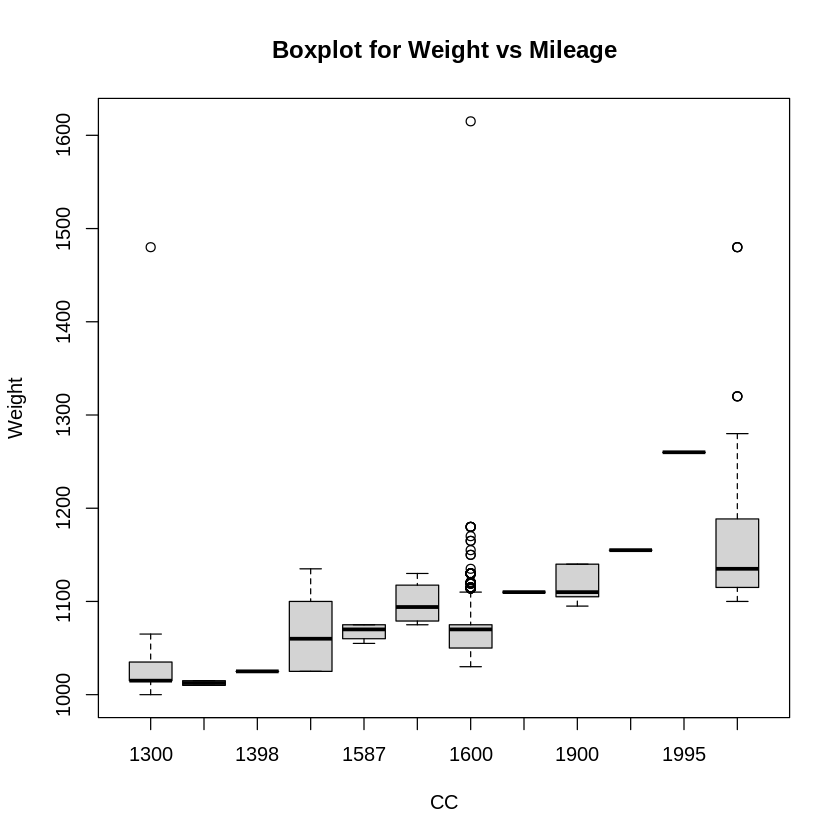

In [11]:
#Plotting Weight vs CC of the car using boxplots
boxplot(filter_df$Weight ~ filter_df$CC, xlab = "CC", ylab = "Weight", main = "Boxplot for Weight vs Mileage")

In [15]:
install.packages("reshape2")
install.packages("ggplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘ggplot’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,Price,Price,1.00
2,Age,Price,-0.88
3,KM,Price,-0.57
4,HP,Price,0.31
5,CC,Price,0.17
6,Weight,Price,0.58


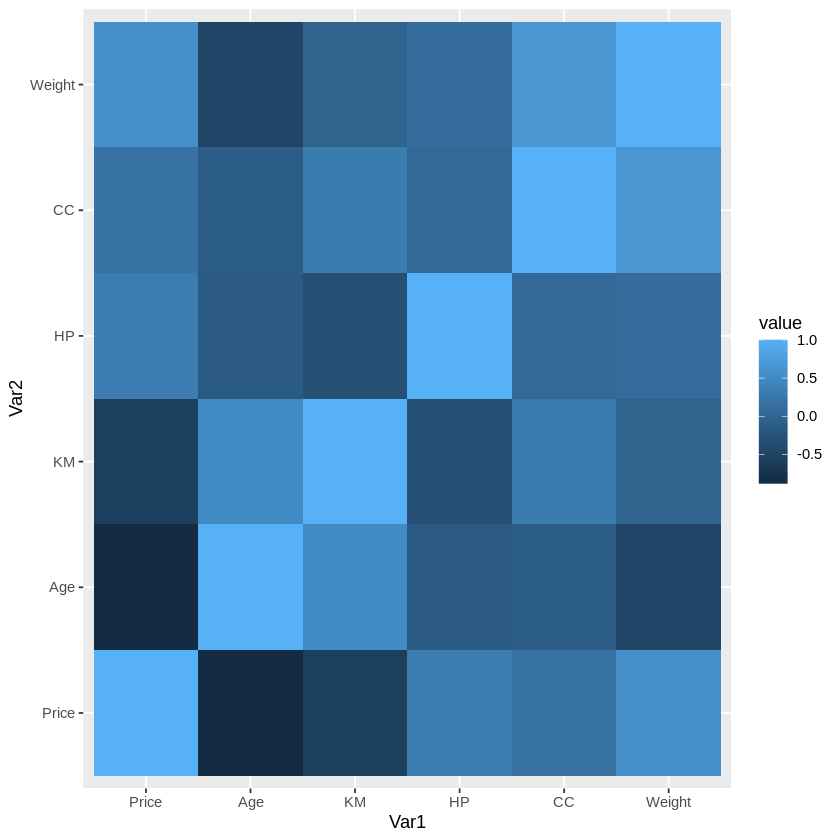

In [16]:
#A heatmap is an important graph that can show us the correlation between the attributes o
library(reshape2)
library(ggplot2)
num_df <- df[, c(1, 2, 3, 5, 8, 10)]
corrmat <- round(cor(num_df),2)
# head(cormat)
melted_corrmat <- melt(corrmat)
head(melted_corrmat)
ggplot(data = melted_corrmat, aes(x=Var1, y=Var2, fill=value)) +
 geom_tile()

Step 2 - Splitting of data into training and test set

In [19]:
#Splitting data into training and testing sets
dt <- sort(sample(nrow(df), nrow(df)*.8))
train<-df[dt,]
test<-df[-dt,]

In [21]:
#Creating our model
model <- lm(Price ~ Age + KM + FuelType + HP + MetColor + Automatic + CC + Doors + Weight , data= train)
summary(model)


Call:
lm(formula = Price ~ Age + KM + FuelType + HP + MetColor + Automatic + 
    CC + Doors + Weight, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-12694.2   -712.6     10.8    718.1   6488.4 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -7.191e+03  1.836e+03  -3.917 9.50e-05 ***
Age            -1.187e+02  2.932e+00 -40.461  < 2e-16 ***
KM             -1.584e-02  1.436e-03 -11.027  < 2e-16 ***
FuelTypeDiesel  2.934e+03  6.346e+02   4.624 4.20e-06 ***
FuelTypePetrol  1.274e+03  4.728e+02   2.695  0.00715 ** 
HP              5.427e+01  6.113e+00   8.877  < 2e-16 ***
MetColor1       1.169e+00  8.325e+01   0.014  0.98880    
Automatic1      2.381e+02  1.756e+02   1.356  0.17551    
CC             -4.210e+00  5.852e-01  -7.194 1.14e-12 ***
Doors3         -5.059e+02  9.254e+02  -0.547  0.58468    
Doors4         -2.067e+02  9.319e+02  -0.222  0.82453    
Doors5         -6.331e+02  9.267e+02  -0.683  0.49462    
Weight   

Step 3 - Training and evaluation of model

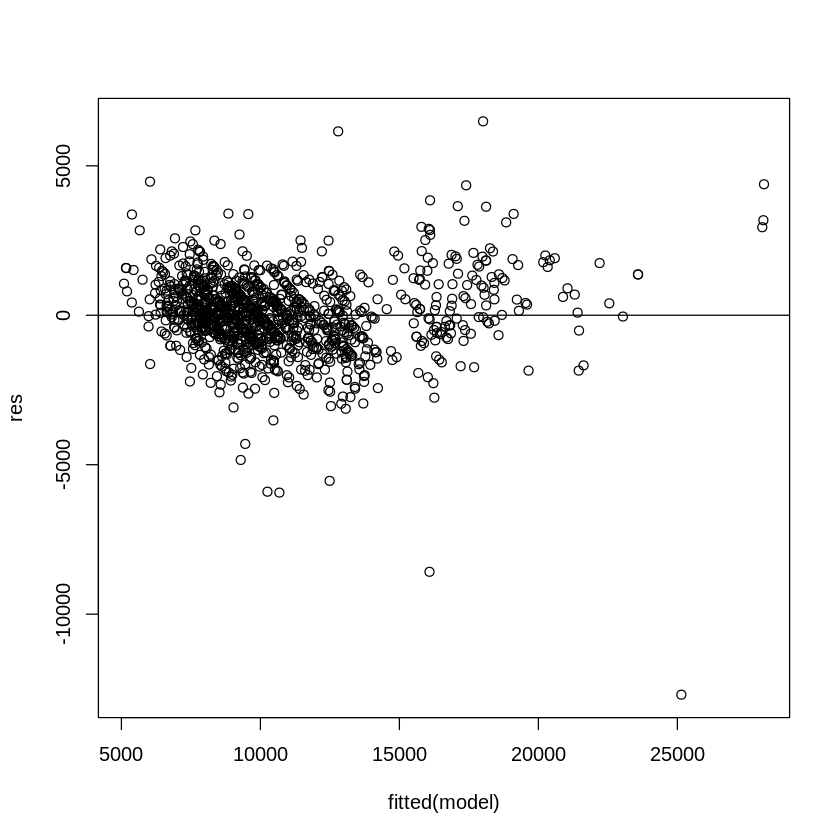

In [22]:
#get list of residuals 
res <- resid(model)
plot(fitted(model), res)
abline(0,0)

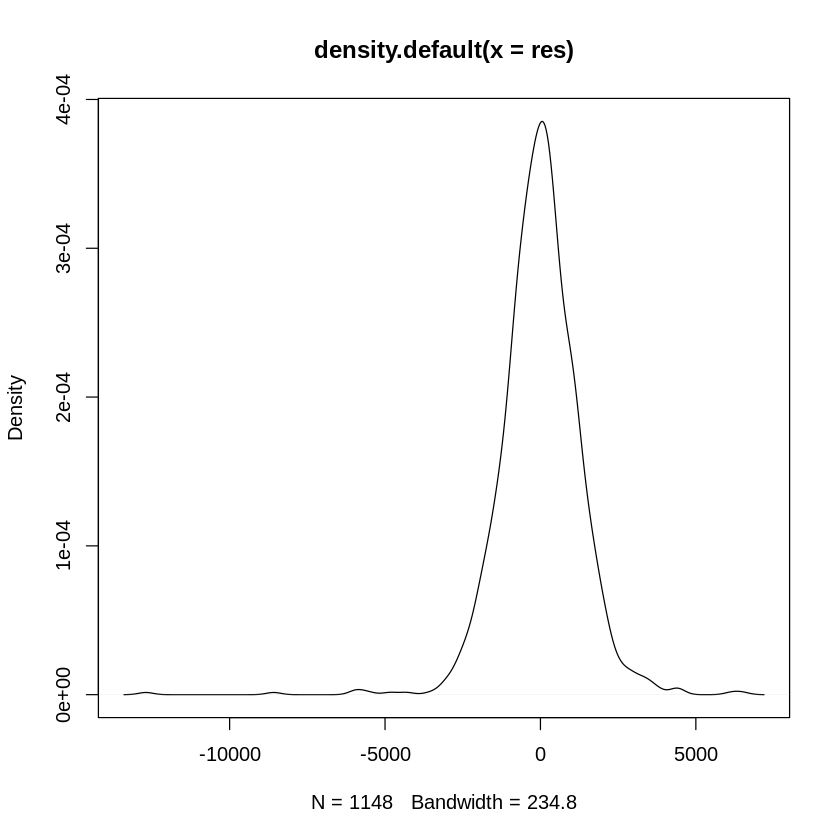

In [23]:
#Plot density plot to check if the residuals are normally distributed
plot(density(res))

In [24]:
#Finding error rate of our model
sigma(model)/mean(train$Price) * 100

[1] 12.18222

In [25]:
testXdf <- test[, c(2, 3, 4, 5, 6, 7, 8, 9, 10)]
x_var <- data.frame(testXdf)
y_var <- data.frame(test[,c(1)])
pred_values <- predict(model, x_var)
answers <- data.frame(y_var, pred_values) 
head(answers)

,test...c.1..,pred_values
,<int>,<dbl>
2,13750,15846.39
6,12950,15086.74
7,16900,16953.24
8,18600,16893.85
17,22750,20830.80
25,16250,15907.54
